In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

%matplotlib inline

plt.style.use('ggplot')

In [2]:
N = 6.022e23
kb = 1.3806503e-23
hbar = 1.054571817e-34

In [3]:
def integrand(x):
    return x**4*np.exp(x) / (np.exp(x)-1)**2

In [4]:
Ts = []
CVs = []
TDebye = 645

with open('specificHeatExperimentalData/silicon.dat', 'r') as f:
    d = f.readlines()
    for i in d:
        k = i.rstrip().split()
        Ts.append(float(k[0]))
        CVs.append(float(k[1]))
Ts = np.array(Ts)[2:20]
CVs = np.array(CVs)[2:20]/4.186

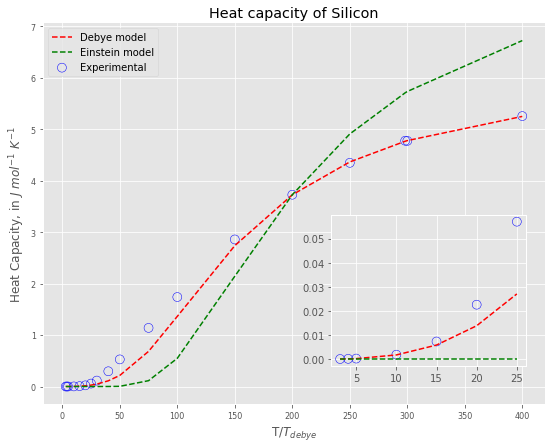

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

debyeCVs = np.array([9*N*kb*(T/TDebye)**3*integrate.quad(integrand,0,TDebye/T)[0]/4.186 for T in Ts])
einsteinCVs = np.array([N*kb*(TDebye/T)**2*np.exp(TDebye/T)/(np.exp(TDebye/T)-1)**2 for T in Ts])

axes = plt.axes([.57, .2, .3, .3])
axes.scatter(Ts[:7], CVs[:7], marker='o', facecolors='none', edgecolors='b', s=80)
axes.plot(Ts[:7], debyeCVs[:7], "--", color="red")
axes.plot(Ts[:7], einsteinCVs[:7], "--", color="green")

ax.scatter(Ts, CVs, marker='o', facecolors='none', edgecolors='b', s=80, label="Experimental")
ax.plot(Ts, debyeCVs, "--", color="red", label='Debye model')
ax.plot(Ts, einsteinCVs, "--", color="green", label='Einstein model')

ax.set_title("Heat capacity of Silicon")
ax.set_xlabel('T/$T_{debye}$')
ax.set_ylabel('Heat Capacity, in $J$ $mol^{-1}$ $K^{-1}$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.setp(ax.get_xticklabels(), fontsize=8)
plt.setp(ax.get_yticklabels(), fontsize=8)
ax.legend()
plt.show()